In [1]:
import nltk
import pandas as pd 
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df = df.sample(5000, random_state=42)
df

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative
...,...,...
39885,One of eastwood's best movies after he had sep...,positive
17566,My blurred childhood memories have kept the ec...,negative
16062,I love Zombie-Movies and I love amateur-produc...,negative
48445,Chan is in New York and he gets involved with ...,positive


In [8]:
df['sentiment'].replace("positive",1, inplace=True)
df['sentiment'].replace("negative",0, inplace=True)
df

,review,sentiment
33553,I really liked this Summerslam due to the look...,1
9427,Not many television shows appeal to quite as m...,1
199,The film quickly gets to a major chase scene w...,0
12447,Jane Austen would definitely approve of this o...,1
39489,Expectations were somewhat high for me when I ...,0
...,...,...
39885,One of eastwood's best movies after he had sep...,1
17566,My blurred childhood memories have kept the ec...,0
16062,I love Zombie-Movies and I love amateur-produc...,0
48445,Chan is in New York and he gets involved with ...,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

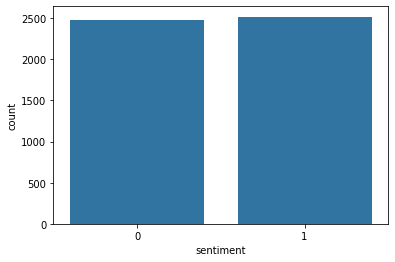

In [12]:
sns.countplot(x='sentiment', data=df)

In [16]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

stop_words = set(stopwords.words("english"))

def preprocess(text):
    
    text = text.lower()
    text = re.sub("<br />","", text)
    text = re.sub(r"http\S+|www\S+|https\S+","", text)    
    text = re.sub(r"[^\w\s]","", text) 
    
    tokens = word_tokenize(text)
    
    filtered = [w for w in tokens if not w in stop_words]
    
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(words) for words in filtered]
    
    return " ".join(stemmed_words)

In [17]:
df['review'] = df['review'].apply(preprocess)

In [18]:
df

,review,sentiment
33553,realli like summerslam due look arena curtain ...,1
9427,mani televis show appeal quit mani differ kind...,1
199,film quickli get major chase scene ever increa...,0
12447,jane austen would definit approv onegwyneth pa...,1
39489,expect somewhat high went see movi thought ste...,0
...,...,...
39885,one eastwood best movi separ western good when...,1
17566,blur childhood memori kept echo cult seri belp...,0
16062,love zombiemovi love amateurproduct meat marke...,0
48445,chan new york get involv attempt sabotag new a...,1


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['review'],df['sentiment'],test_size= 0.2, random_state=42)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()

x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(layers=[
    Dense(16, input_dim = x_train_vect.shape[1], activation = 'relu'), # Input dim it must be
    Dense(8, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ['accuracy'])

model.summary()

D:\Anaconda\envs\pytorch\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │       579,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 579,985 (2.21 MB)

 Trainable params: 579,985 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(x_train_vect, y_train,  epochs=4)

Epoch 1/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6843 - loss: 0.6645
Epoch 2/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9209 - loss: 0.4564
Epoch 3/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9566 - loss: 0.2608
Epoch 4/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9769 - loss: 0.1470


In [30]:
preds = model.evaluate(x_test_vect,y_test, batch_size=10)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8384 - loss: 0.3370


In [33]:
statement = "Movie was worst!"

processed = preprocess(statement)
vector = vect.transform([processed]) # Inside the [] it must be

pred = model.predict(vector)

if pred[0]>0.5:
    print("Positive")
else:
    print("negative")
    
print(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
negative
[0.00177572]
